# Advertising Sales Channel Prediction

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored .

The company has to select proper sales channel to predict the right sales channel to generate good revenue. 

In this project, we aim to predict that how different Sales Channels impact the Sales of any company.
We will be using different regression models to achieve the desired outputs.

# Importing the necessary libraries

In [8]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [9]:
sales_data = pd.read_csv('sales.csv')

In [10]:
sales_data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


A brief about the data -

The data consists of 5 different columns -

Column 1 (Unnamed) - This column is just adding sequence to the data, and has unique values. We can drop this column since it does not make any impact on the sales.

TV - The budget spent over TV advertising.

Radio - The budget over radio advertising.

Newspaper - The budget over Newspaper advertising.

Sales - The target variable, the sales which happened as a result of advertising over various advertising modes.

In [11]:
sales_data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


From the first look at the data, it is observed that the budget spent over TV is higher than other modes, indicating that TV is the preferred mode of advertising.
Going further, we will analyse how it actually impacts the sales generated.

Apart from this, we also observe that the maximum value and mean value in the newspaper data has a noticable difference. We might see some outliers in this column.

In [12]:
#Dropping the unnamed column

sales_data.rename({'Unnamed: 0':'a'}, axis = 'columns', inplace = True) #rename the column to drop it by the normal method
sales_data.drop('a', axis = 1, inplace = True)

In [13]:
sales_data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Observing the missing data

In [14]:
#Checking NaN values

sales_data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

The result above displays the absence of NaN values in the data. However, let us check the datatypes of the columns, to confirm the absence of any null value.

In [15]:
sales_data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

The columns are of float category, which suggests that all the columns contain float values only, and hence null values are not there in the data.

# Exploratory data analysis

We will first analyse the distributions of budgets into various advertising channels. We will plot distribution plots for the same.

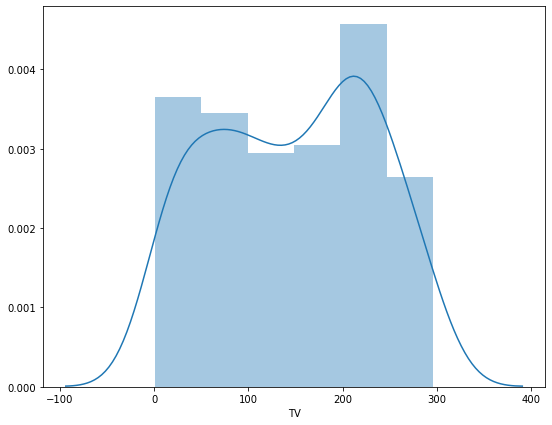

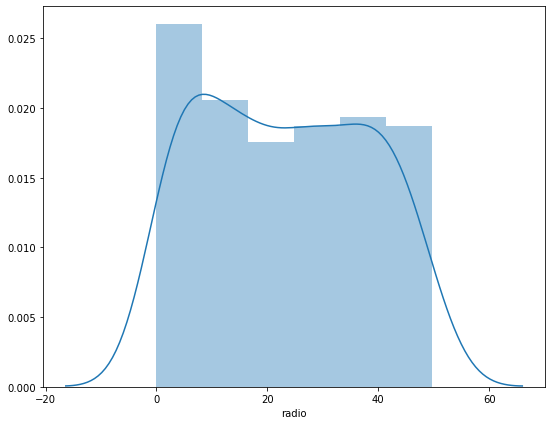

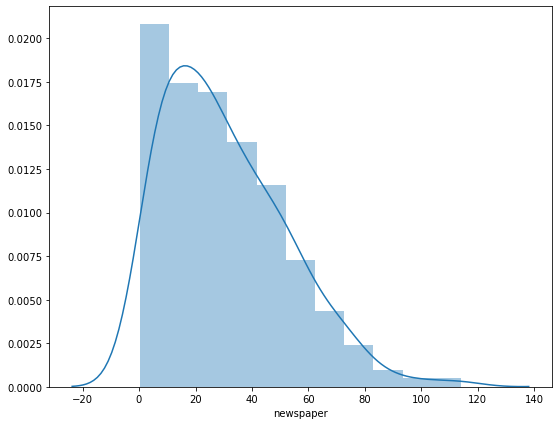

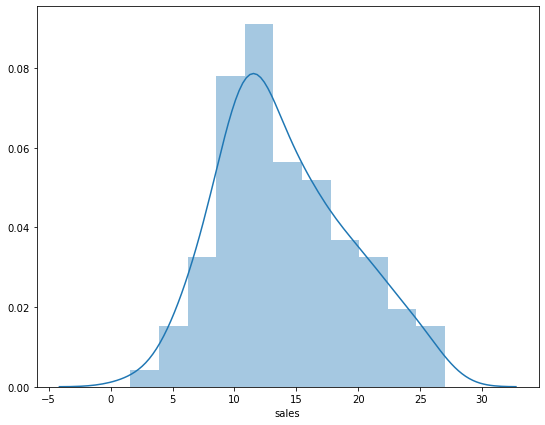

In [16]:
for i in sales_data.columns:
    plt.figure(figsize = (9,7))
    sns.distplot(sales_data[i])
    plt.show()

As it can be seen from the above plots, the budgets spent over TV advertising are the maximum, ranging between 0 to 300. Number of values are maximum in between 200 - 250, but the plot is scattered equally in all the ranges i.e. values in 0 to 50 are similar to 100-150, 150-200. There are differences, but not very huge gaps.

Radio advertising budget falls between 0 to 50, implying that people spend lesser on radio advertising.

Newspaper advertising budgets fall between 0 - 120. However, the count is higher in the range 0-20, and decreases as the budget increases, implying that people spending higher on newspaper advertising are lesser in number.

Sales data is spread between  ~ 2 to 27, and is highest in the range ~9 to 13.

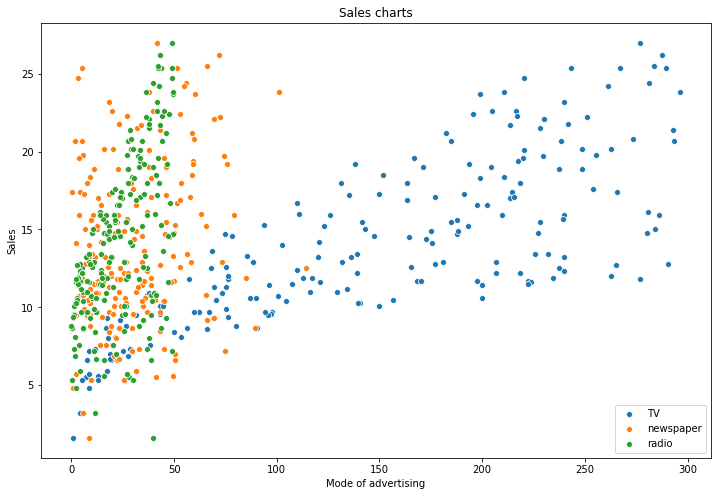

In [17]:
modes = ['TV','newspaper','radio']

plt.figure(figsize=(12,8))
for i in modes:
    plt.title('Sales charts')
    sns.scatterplot(data = sales_data, x = sales_data[i], y = 'sales')
    plt.xlabel('Mode of advertising')
    plt.ylabel('Sales')
    plt.legend(modes)


From the above chart, we realise that the TV requires a good budget to increase the sales, the linear relation can be seen from the graph. As the TV budget increases, the sales increase.

But if we take the case of Newspaper and radio, we see a steep raise in the sales within the budget of ~ 0 - 80.


# Correlation graph

Let us now check the correlation of different modes of advertising with Sales variable.

In [18]:
correlation = sales_data.corr()

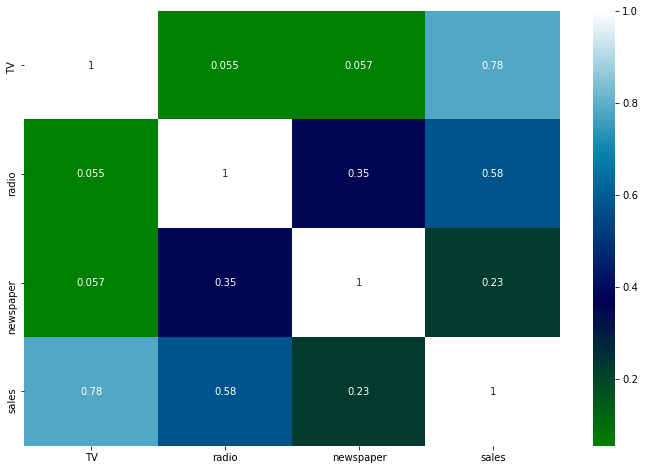

In [19]:
# Plotting a correlation heatmap

plt.figure(figsize = (12,8))
sns.heatmap(correlation, cmap='ocean', annot = True)

From the above graph, we see that the sales are most impacted by TV as the mode of advertisement. TV impacts 78% of the sales.


Radio has a 58% impact on the sales while the newspaper has a 23% impact.

We also see that newspaper and radio are correlated by 35%, which states that radio and newspaper are chosen together in a noticeable manner.

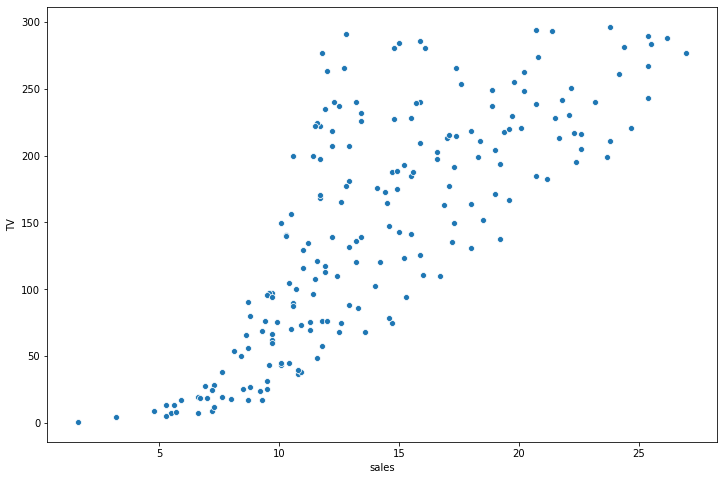

In [20]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = sales_data['sales'], y = sales_data['TV'])

The graph sees a steep slope between 50 - 150 TV budget, where the sales increase in the range 5 - 10.

# Skewness removal

Let us check the presence of skewness and try to treat it in order to normalize the data to be provided to the ML model.

In [21]:
sales_data.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

The skewness needs to be removed from newspaper column. We will use squareroot transform here as the log transform is increasing the skewness.

In [22]:
sales_data['newspaper'] = np.sqrt(sales_data['newspaper'])

In [23]:
sales_data.skew()

TV          -0.069853
radio        0.094175
newspaper    0.062388
sales        0.407571
dtype: float64

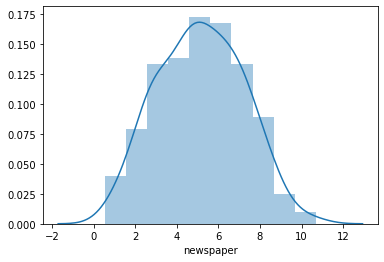

In [24]:
sns.distplot(sales_data['newspaper'])

We have successfully removed the skewness from the data

# Outliers detection and treatment

Let us check if the data contains any outlier values which might be adding noise to the data

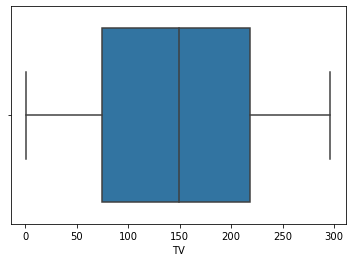

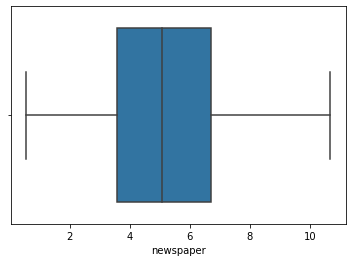

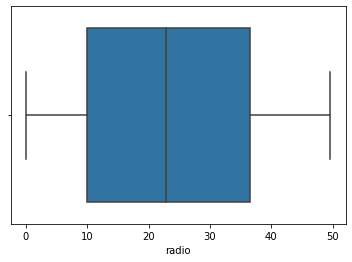

In [25]:
for i in modes:
    sns.boxplot(sales_data[i])
    plt.show()

The boxplot shows that we do not have outliers in the data and hence can proceed with implication of ML models

# Deploying ML models

In [26]:
#Dividing the dependent and independent data

x = sales_data.drop('sales', axis = 'columns')
y = sales_data['sales']

In [27]:
x.shape, y.shape

((200, 3), (200,))

In [28]:
# Splitting the data set into train and test data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [29]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((140, 3), (60, 3), (140,), (60,))

In [30]:
#Checking the performance of multiple models

#Create objects for multiple models

dt = DecisionTreeRegressor()
svr = SVR(kernel = 'rbf')
knn = KNeighborsRegressor()
lr = LinearRegression()

In [31]:
#Fitting and predicting scores

for i in [dt, svr, knn, lr]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print(i)
    print('R2 score is ',r2_score(y_test, pred))
    print('R2 for train data', r2_score(y_train,i.predict(x_train)))
    print('Mean absolute error is ',mean_absolute_error(y_test, pred))
    print('Mean squared error is ', mean_squared_error(y_test, pred))
    print('------------------------------------------')

DecisionTreeRegressor()
R2 score is  0.9308541628961899
R2 for train data 1.0
Mean absolute error is  1.0366666666666668
Mean squared error is  1.8880000000000003
------------------------------------------
SVR()
R2 score is  0.8330171454764129
R2 for train data 0.798437129988492
Mean absolute error is  1.5876299526304811
Mean squared error is  4.559401441148523
------------------------------------------
KNeighborsRegressor()
R2 score is  0.96242832024997
R2 for train data 0.9620252812121493
Mean absolute error is  0.8099999999999999
Mean squared error is  1.0258800000000001
------------------------------------------
LinearRegression()
R2 score is  0.862398473183113
R2 for train data 0.9055154020735465
Mean absolute error is  1.5045998232020414
Mean squared error is  3.7571557958037616
------------------------------------------


# Ensemble techniques

In [32]:
rfr = RandomForestRegressor()

In [33]:
rfr.fit(x_train, y_train)
predict = rfr.predict(x_test)
print('R2 score is ',r2_score(y_test, pred))
print('R2 for train data', r2_score(y_train,rfr.predict(x_train)))
print('Mean absolute error is ',mean_absolute_error(y_test, pred))
print('Mean squared error is ', mean_squared_error(y_test, pred))

R2 score is  0.862398473183113
R2 for train data 0.9964538467467087
Mean absolute error is  1.5045998232020414
Mean squared error is  3.7571557958037616


# Choosing the best model

As we compare the metrics of the models which we tested, we see that K-Neighbors is performing the best and is not showing overfitting, since the r2_score for train and test data are 96%.

Rest of the models are showing slight overfitting, hence we will proceed with the K-Neighbors model.

# Cross validation of the selected model

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
cv = cross_val_score(knn, x, y, cv=5, scoring = 'r2')
print('Cross validation score : ', cv.mean())

Cross validation score :  0.9532825036097394


The cross validation score is also similar which suggests that we do not have overfitting in our model.

# Hypertuning the selected model

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [38]:
gridcv = GridSearchCV(knn, {'n_neighbors': list(range(1,10)), 'weights': ['uniform', 'distance'], 'n_jobs':[1,2,3], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size':[10,20,30],'p':[1,2,3,4,5]})

In [39]:
param_list = gridcv.fit(x_train, y_train)

In [40]:
param_list.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_jobs': 1,
 'n_neighbors': 4,
 'p': 1,
 'weights': 'distance'}

In [41]:
param_list.best_score_

0.9471032851771997

Grid search is giving best score as 94%, and the default params are giving result as ~96%,

Hence we will stick to the default params, and save the model.

# Saving the model

In [42]:
import joblib

In [43]:
joblib.dump(knn,'sales.obj')

['sales.obj']

# Conclusion

We have created a machine learning model which provides result with 96% accuracy using Kneighbors regression machine learning algorithm.

In [44]:
check = joblib.load('sales.obj')

In [46]:
result = check.predict(x_test)

In [47]:
r2_score(y_test,result)

0.96242832024997

In [48]:
compare = pd.DataFrame({'Actual':y_test,'Predicted':result})

In [49]:
compare

,Actual,Predicted
95,16.9,17.64
15,22.4,21.50
30,21.4,22.20
158,7.3,7.52
128,24.7,22.52
115,12.6,13.26
69,22.3,21.10
170,8.4,9.54
174,11.5,13.10
45,14.9,15.12
